In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import experiments.objective_functions as of
from experiments.apply_binarization import get_mask

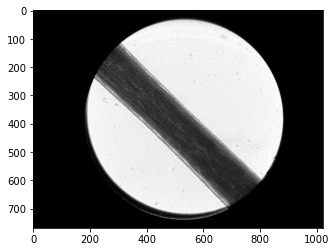

In [2]:
img = cv.imread('../datasets/Human Hair/frame72.jpg', cv.IMREAD_COLOR)
grayscale_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(grayscale_img, cmap='gray')

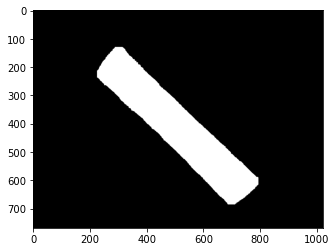

In [3]:
mask = get_mask(grayscale_img, 2)

kernel = np.ones((5, 5), np.uint8)
erosion = cv.erode(mask, kernel, iterations=6)
#plt.imshow(erosion, cmap='gray')

dilation = cv.dilate(erosion, kernel, iterations=6)
plt.imshow(dilation, cmap='gray')
mask = dilation
plt.imshow(mask, cmap='gray')

In [4]:
raw_mask = mask.reshape(-1, 2)

In [5]:
x = np.array([[1, 2], [3, 4]])
mx = np.ma.array(x, mask = [[0, 1], [0, 1]])

x = [[2, 1], [4, 5]]

In [15]:
focus_map = np.zeros((grayscale_img.shape[0], grayscale_img.shape[1]), np.uint8)
window_size = 11

for (y, x) in np.array(np.where(mask == 255)).transpose().reshape(-1, 2):
    half_window_size = (window_size - 1) // 2
    lower_x = max(0, x - half_window_size)
    upper_x = min(grayscale_img.shape[1], x + half_window_size) + 1
    lower_y = max(0, y - half_window_size)
    upper_y = min(grayscale_img.shape[0], y + half_window_size) + 1

    window = np.zeros((window_size, window_size), np.uint8)
    window = window + np.mean(grayscale_img[lower_y:upper_y, lower_x:upper_x][mask[lower_y:upper_y, lower_x:upper_x] == 255])

    #print(mask[lower_y:upper_y, lower_x:upper_x] == 255)
    #window[mask[lower_y:(upper_y+1), lower_x:(upper_x+1)] == 255] = grayscale_img[lower_y:upper_y, lower_x:upper_x]
    np.putmask(window, mask[lower_y:upper_y, lower_x:upper_x] == 255, grayscale_img[lower_y:upper_y, lower_x:upper_x])
    focus_map[y, x] = of.LAPM(grayscale_img[lower_y:upper_y, lower_x:upper_x])
    #focus_map[y, x] = of.LAPM(window)

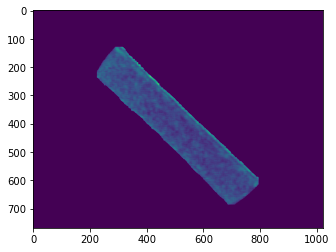

In [16]:
plt.imshow(focus_map)


In [17]:
focus_map_with_masked_windowing = np.zeros((grayscale_img.shape[0], grayscale_img.shape[1]), np.uint8)

for (y, x) in np.array(np.where(mask == 255)).transpose().reshape(-1, 2):
    half_window_size = (window_size - 1) // 2
    lower_x = max(0, x - half_window_size)
    upper_x = min(grayscale_img.shape[1], x + half_window_size) + 1
    lower_y = max(0, y - half_window_size)
    upper_y = min(grayscale_img.shape[0], y + half_window_size) + 1

    window = np.zeros((window_size, window_size), np.uint8)
    window = window + np.mean(grayscale_img[lower_y:upper_y, lower_x:upper_x][mask[lower_y:upper_y, lower_x:upper_x] == 255])

    #print(mask[lower_y:upper_y, lower_x:upper_x] == 255)
    #window[mask[lower_y:(upper_y+1), lower_x:(upper_x+1)] == 255] = grayscale_img[lower_y:upper_y, lower_x:upper_x]
    np.putmask(window, mask[lower_y:upper_y, lower_x:upper_x] == 255, grayscale_img[lower_y:upper_y, lower_x:upper_x])
    #focus_map[y, x] = of.LAPM(grayscale_img[lower_y:upper_y, lower_x:upper_x])
    focus_map_with_masked_windowing[y, x] = of.LAPM(window)

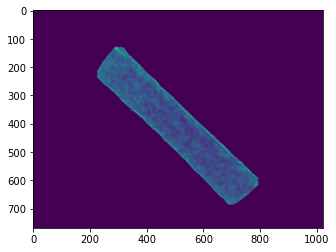

In [18]:
 
plt.imshow(focus_map_with_masked_windowing)


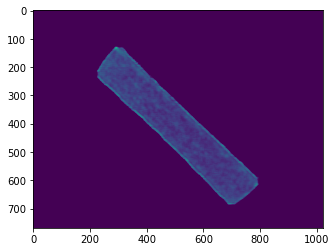

In [19]:
focus_map_diff = cv.absdiff(focus_map_with_masked_windowing, focus_map)
plt.imshow(focus_map_diff)